# Test Precessing Final Spin from arxiv:1605.01938

### Setup Environment

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
from matplotlib.pyplot import *
# Import needed packages from positive
from positive.plotting import sYlm_mollweide_plot
from positive import alert
# Import other usefuls
from os.path import expanduser
from nrutils import scsearch,gwylm
from nrutils.core.basics import *
from numpy import *

(positive)>> Applying custom matplotlib settings.


### Find a simulation

In [66]:
A = scsearch(institute='bam',keyword='q4a08t60dPm2',verbose=True)

(scsearch)>> Found institute (=bam) keyword.
(scsearch)>> Found keyword (=q4a08t60dPm2) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][hogshead] q4: 1chi0.80-p-q4.00	(q4a08t60dPm2_T_96_360)



### Load waveform data

In [90]:
y = gwylm(A[0],lmax=2,verbose=True,clean=True)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lmax (=2) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x1148f0998>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (5,7), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (2, -2), (2, -1), (2, 0), (2, 1)]
(load)>> Using the default extraction_parameter of 5
(load)>> Using the default level of 7
(load)>> Loading: psi3col.r5.l7.l2.m2.gz
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The waveform time series is now monotonic.
(straighten_wfarr!)>> Repeat

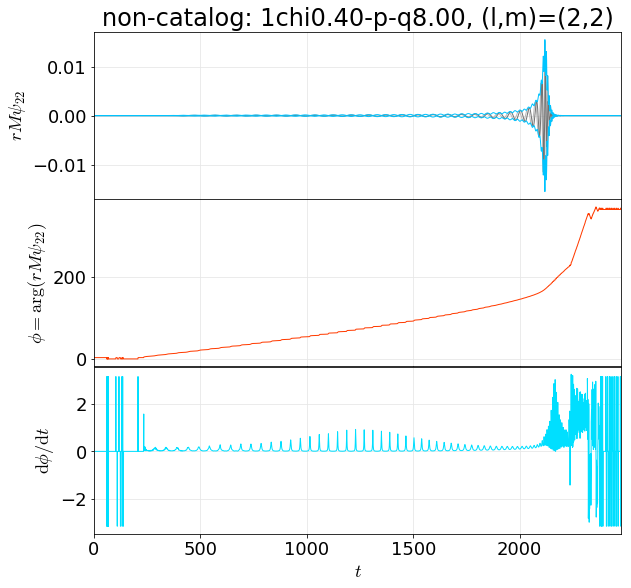

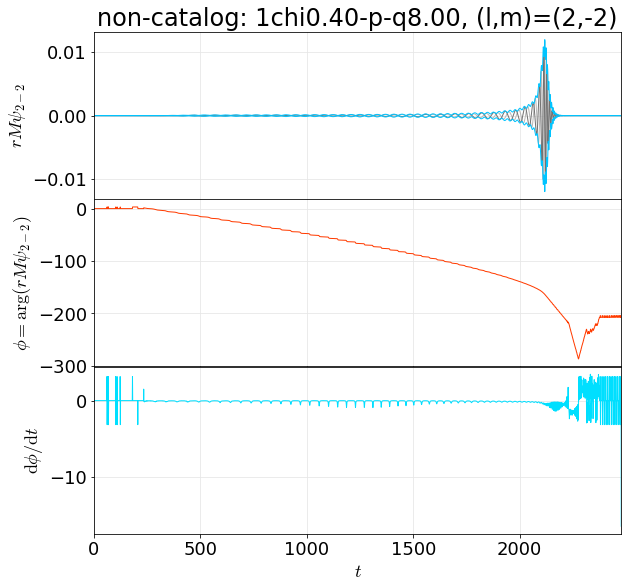

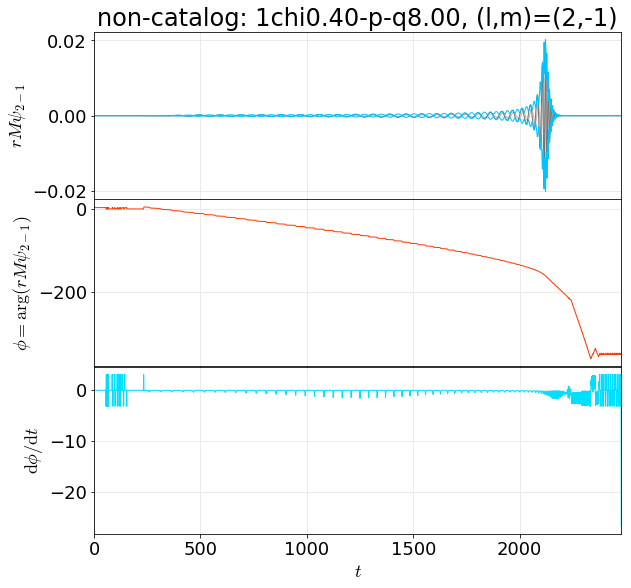

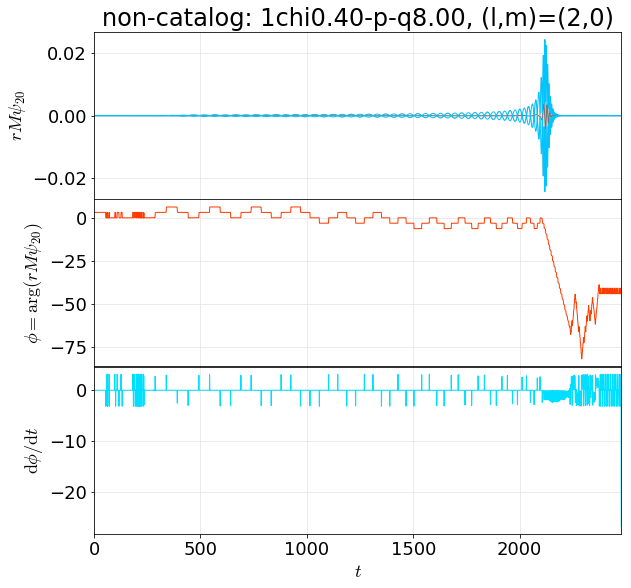

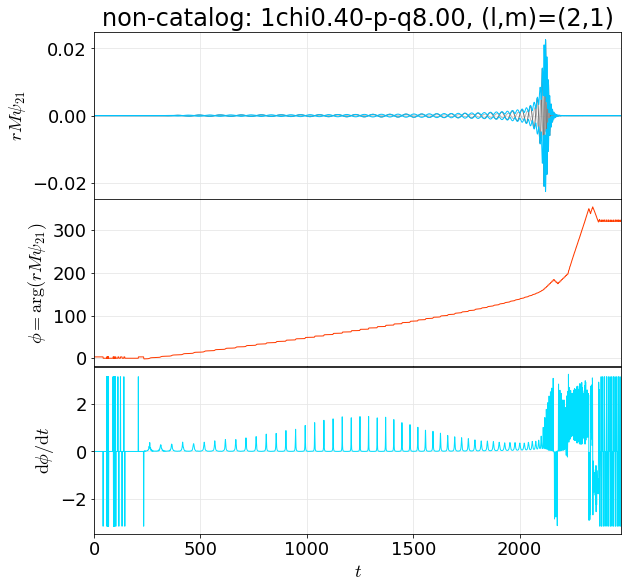

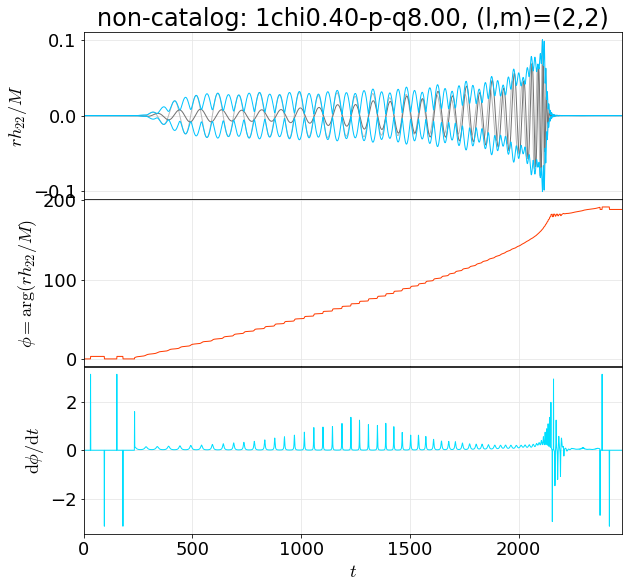

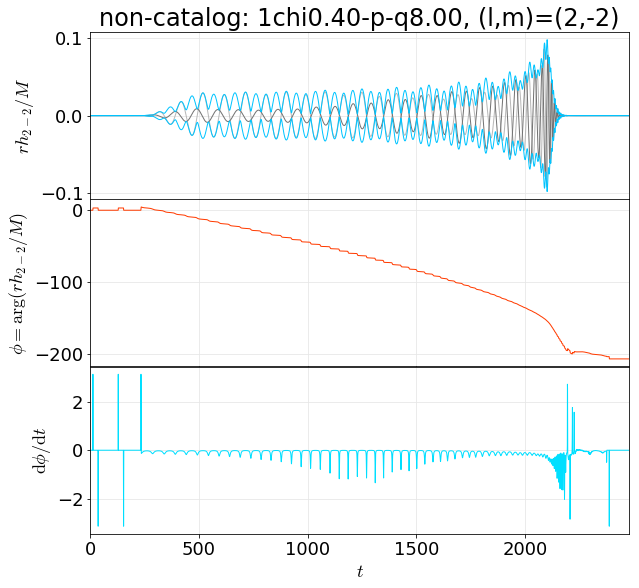

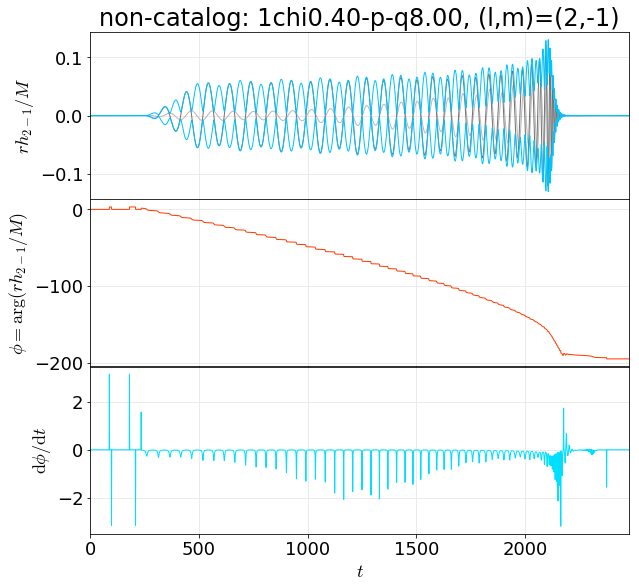

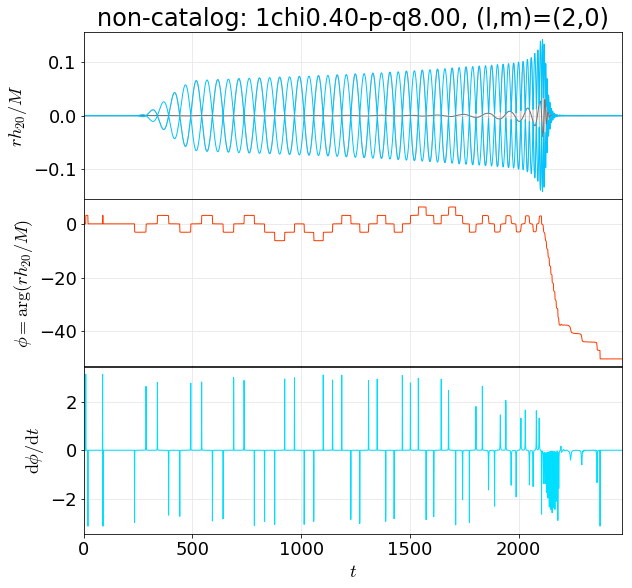

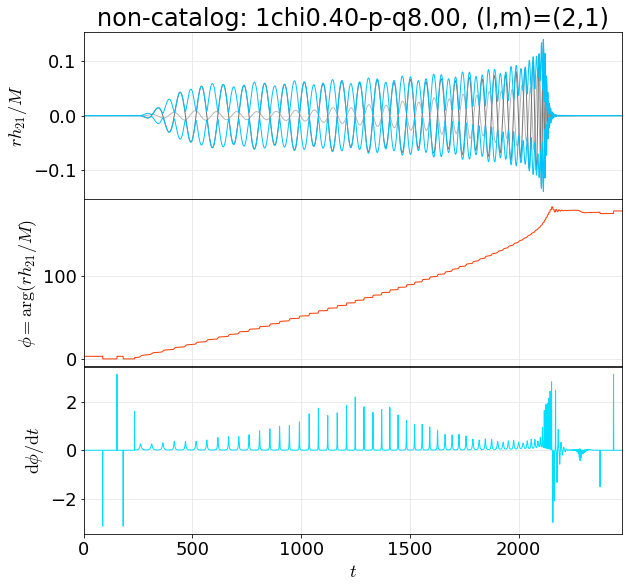

In [3]:
y.plot()

### Print metadata of interest

In [62]:
y.__calc_radiated_quantities__()

In [63]:

#
from numpy.linalg import norm

#
e = A[0]

print e.m1, e.m2, e.X1, e.X2, e.L

#
print '* Jf from radiated: ', y.remnant['J'][-1], norm(y.remnant['J'][-1])
print '* Jf from bbh:      ', e.Xf, norm(e.Xf)
jf_de_fit = jf160501938( e.m1, e.m2, e.X1, e.X2, L_vec=e.L )
print '* Jf from fit:      ', jf_de_fit
print '* L = ',y.L
print '* angle = ',arccos(dot(e.J/linalg.norm(e.J),y.remnant['J'][-1]/linalg.norm(y.remnant['J'][-1])))



0.80001 0.2 [ 0.03053955  0.69499356  0.39499169] [ 0.  0.  0.] [ 0.04864708  0.          0.62919165]
* Jf from radiated:  [ 0.03709421  0.35447638  0.6917268 ] 0.778148727999
* Jf from bbh:       [ 0.0285117   0.31668915  0.61173735] 0.689440002201
* Jf from fit:       0.806480189584
* L =  [ 0.04864708  0.          0.62919165]
* angle =  0.02219514127


In [64]:
jf160501938( 0.5, 0.5, 0*e.X1, 0*e.X2 )

(jf160501938!)>> No initial orbital angular momentum vevtor given. We will assume it is z-ligned.


0.68653243503443873

### Plot the mass quadrupole

([<matplotlib.axes._subplots.AxesSubplot at 0x112212b50>,
 <matplotlib.figure.Figure at 0x113e00d10>)

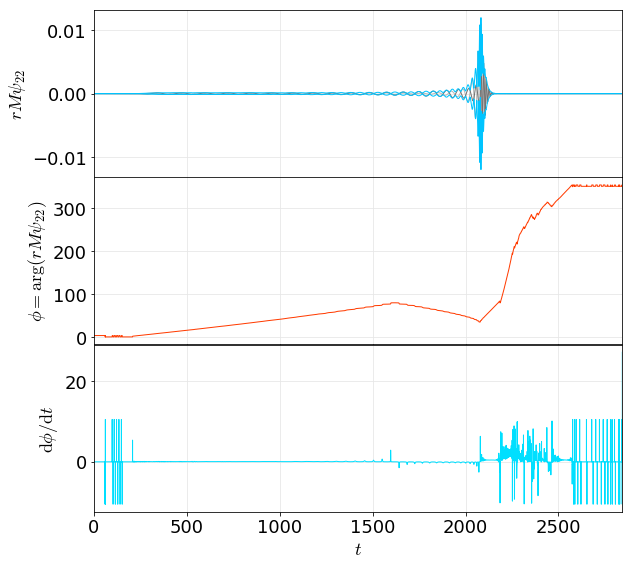

In [5]:
y[2,2]['psi4'].plot()

### Use package function to save data

In [24]:
#
for kind in ('psi4','news','strain'):
    y.saveto('/Users/book/Desktop/',kind=kind)

(mkdir)>> Directory at "/Users/book/Desktop/q4a08t120dP1_T_96_360" already exists and will be not be altered or created..
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m-1.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m2.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m-1.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m1.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m3.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l3m0.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m-2.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m2.asc"
(saveto)>> ascii data stored to "/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m1.asc"
(saveto)>> ascii data stored 

In [26]:
a = loadtxt('/Users/book/Desktop/q4a08t120dP1_T_96_360/psi4_bam_l2m2.asc')
t,p,c = a.T

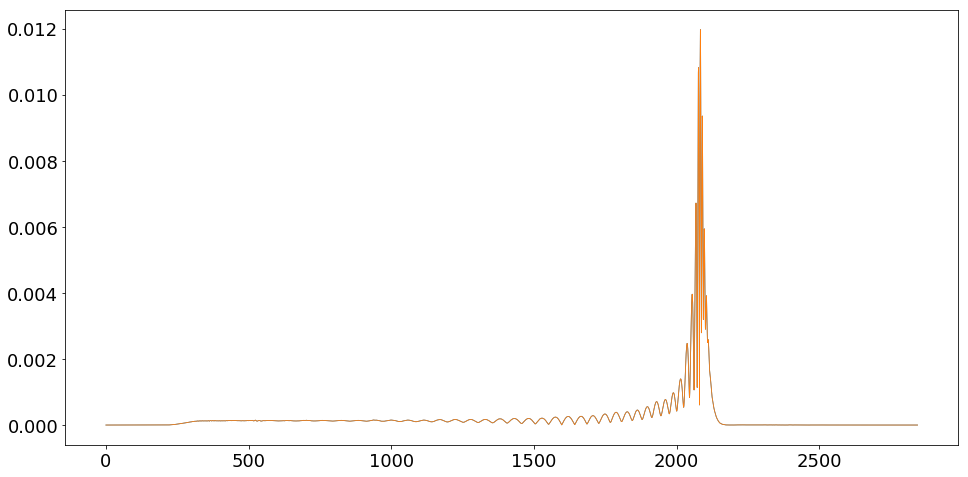

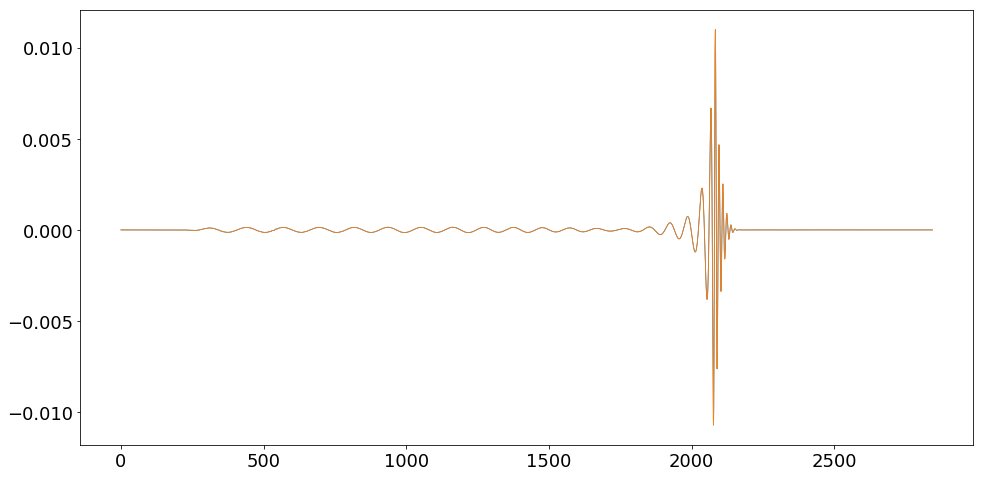

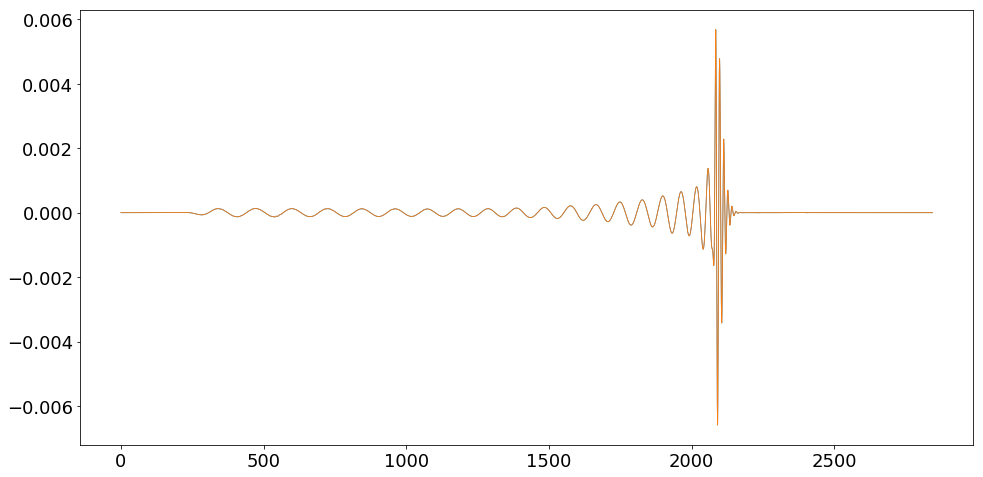

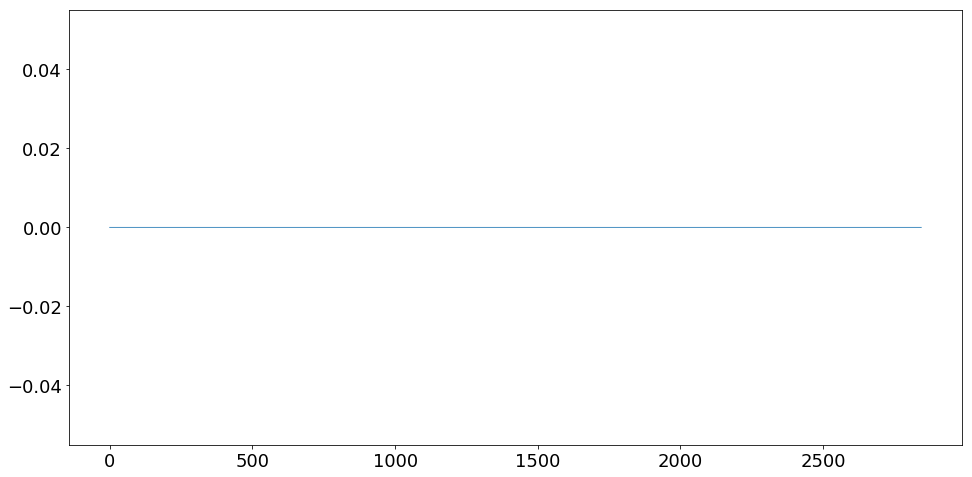

In [34]:

fig = figure( figsize = 2*figaspect(0.5) )
plot( t, abs(p+1j*c) )
plot( y.t, y[2,2]['psi4'].amp )

fig = figure( figsize = 2*figaspect(0.5) )
plot( t, p )
plot( y.t, y[2,2]['psi4'].plus )

fig = figure( figsize = 2*figaspect(0.5) )
plot( t, c )
plot( y.t, y[2,2]['psi4'].cross )

fig = figure( figsize = 2*figaspect(0.5) )
plot( y.t, abs(p+1j*c)-y[2,2]['psi4'].amp )